# Capstone Webscrapping using BeautifulSoup


## Background
In this capstone project, I want to retrieve data on historical exchange rates between the Indonesian Rupiah and the US Dollar.The target web page is https://www.exchange-rates.org/history/IDR/USD/T. I will use `BeautifulSoup` in order to read data from the html page easily. 

## Requesting the data and creating a BeautifulSoup

Let's begin with requesting the data from the web page with `get` method.

In [47]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly we get from the `request.get`, we can use .content to do slicing as needed.

In [48]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title><!-- Quantcast Choice. Consent Manager Tag v2.0 (for TCF 2.0) -->\r\n<script type="text/javascript" async=true>\r\n(function() {\r\n  var host = window.location.hostname;\r\n  var element = document.createElement(\'scri'

Since the document above are very unstructured and complex, the beautiful soup function is used. Beautiful soup class will result a beautifulsoup object and transform a complex HTML document into a complex tree of Python objects. 

In [49]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & extracting the right information

Let's see how the beautiful soup looks like. The content below is the same with `get_url` object but it's tidier. Also, for the simplicity of this notebook, I slice to only see the first 500 characters.

In [50]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/9/2021
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-9-2021">
      14,499.31330
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-9-2021">
      USD IDR rate for 7/9/2021
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/8/2021
    </td>
    <td>
 


The line above use the `table` tag as a section in an HTML document. The `find()` help me to get part of the html code that I need, though it is only helpful for finding out the **first tag** with the specified name or id and returning an object type bs4. Hence, now I will use `find_all` for finding out **all tags** with specified tag name or id and returning them as a list of type bs4.

In [93]:
table.find_all('tr', attrs={'td': ''})[:6]

[<tr><td>7/9/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-9-2021">14,499.31330</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-9-2021">USD IDR rate for 7/9/2021</a></td></tr>,
 <tr><td>7/8/2021</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-8-2021">14,515.87714</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-8-2021">USD IDR rate for 7/8/2021</a></td></tr>,
 <tr><td>7/7/2021</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-7-2021">14,503.93654</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2021">USD IDR rate for 7/7/2021</a></td></tr>,
 <tr><td>7/6/2021</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-6-2021">14,469.58258</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2021">USD IDR rate for 7/6/2021</a></td></tr>,
 <tr><td>7/5/2021</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-5-2021">14,493.33968</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rat

To get the only text information, I add `.text`.

In [94]:
table.find_all('tr', attrs={'td': ''})[0].text

'7/9/2021Friday14,499.31330 IDRUSD IDR rate for 7/9/2021'

### Extracting the information

Now, all the beautiful soup part is over. All the left to do is doing some programming to extract all the data automatically, and I use looping method instead of doing it manually. Since `find_all` will always return data in format list, I will use `len()` to check how long is our list.

In [53]:
row = table.find_all('tr', attrs={'td':''})
row_length = len(row)
row_length

132

After knowing the length of the data, then I will do the looping process.

Here what the looping do to scrap the information:
- First, I establish a placeholder to receive the information that I scrap.
- I named a placeholder `temp` and it's a list.
- Then, I will make a loop from one until the the length of the table row, which I will find all cell of the column one and two which contain the date and the exchange rates.
- After that, I will append it to the tuple that I prepared before. Every one iteration I will scrap one line of the table.

In [54]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    data = table.find_all('tr', attrs={'td':''})[i].text
       
    temp.append((data)) 
    
temp 

['7/9/2021Friday14,499.31330 IDRUSD IDR rate for 7/9/2021',
 '7/8/2021Thursday14,515.87714 IDRUSD IDR rate for 7/8/2021',
 '7/7/2021Wednesday14,503.93654 IDRUSD IDR rate for 7/7/2021',
 '7/6/2021Tuesday14,469.58258 IDRUSD IDR rate for 7/6/2021',
 '7/5/2021Monday14,493.33968 IDRUSD IDR rate for 7/5/2021',
 '7/2/2021Friday14,497.65100 IDRUSD IDR rate for 7/2/2021',
 '7/1/2021Thursday13,270.37815 IDRUSD IDR rate for 7/1/2021',
 '6/30/2021Wednesday14,491.89811 IDRUSD IDR rate for 6/30/2021',
 '6/29/2021Tuesday13,215.84052 IDRUSD IDR rate for 6/29/2021',
 '6/28/2021Monday14,439.22236 IDRUSD IDR rate for 6/28/2021',
 '6/25/2021Friday14,426.82283 IDRUSD IDR rate for 6/25/2021',
 '6/24/2021Thursday14,436.21247 IDRUSD IDR rate for 6/24/2021',
 '\n\n\n\n\n\n',
 '6/23/2021Wednesday14,440.32729 IDRUSD IDR rate for 6/23/2021',
 '6/22/2021Tuesday14,396.08712 IDRUSD IDR rate for 6/22/2021',
 '6/21/2021Monday14,426.42481 IDRUSD IDR rate for 6/21/2021',
 '6/18/2021Friday14,440.13691 IDRUSD IDR rate for

Then after we fix the list a bit, I will input it to `pandas` dataframe.

## Creating pandas dataframe & data wrangling

In [83]:
import pandas as pd

df = pd.DataFrame(temp, columns = ['data'])
df.head()

,data
0,"7/9/2021Friday14,499.31330 IDRUSD IDR rate for..."
1,"7/8/2021Thursday14,515.87714 IDRUSD IDR rate f..."
2,"7/7/2021Wednesday14,503.93654 IDRUSD IDR rate ..."
3,"7/6/2021Tuesday14,469.58258 IDRUSD IDR rate fo..."
4,"7/5/2021Monday14,493.33968 IDRUSD IDR rate for..."


In [84]:
# Split the data column as a single column into multiple columns and tidy up the dataframe as needed
df[['a','b','c','d','e','f']]= df.data.str.split(expand=True)
df1 = df.drop(['data','b','c','d','e'], axis = 1)
df1

,a,f
0,"7/9/2021Friday14,499.31330",7/9/2021
1,"7/8/2021Thursday14,515.87714",7/8/2021
2,"7/7/2021Wednesday14,503.93654",7/7/2021
3,"7/6/2021Tuesday14,469.58258",7/6/2021
4,"7/5/2021Monday14,493.33968",7/5/2021
...,...,...
127,"1/15/2021Friday14,153.46654",1/15/2021
128,"1/14/2021Thursday14,070.58746",1/14/2021
129,"1/13/2021Wednesday14,125.90174",1/13/2021
130,"1/12/2021Tuesday14,074.81444",1/12/2021


In [85]:
# Take specific value within the column 'a' for the exchange_rates column & tidy up the dataframe as needed
df1['exchange_rates'] = df1['a'].str[-12:]
df2 = df1.drop(['a'], axis=1)
df2

,f,exchange_rates
0,7/9/2021,"14,499.31330"
1,7/8/2021,"14,515.87714"
2,7/7/2021,"14,503.93654"
3,7/6/2021,"14,469.58258"
4,7/5/2021,"14,493.33968"
...,...,...
127,1/15/2021,"14,153.46654"
128,1/14/2021,"14,070.58746"
129,1/13/2021,"14,125.90174"
130,1/12/2021,"14,074.81444"


In [86]:
# Change the data type for the date column & tidy up the dataframe as needed
df2['date'] = df2['f'].astype('datetime64')
df3 = df2.drop(['f'], axis = 1)
print(df3)
print(df3.info())

    exchange_rates       date
0     14,499.31330 2021-07-09
1     14,515.87714 2021-07-08
2     14,503.93654 2021-07-07
3     14,469.58258 2021-07-06
4     14,493.33968 2021-07-05
..             ...        ...
127   14,153.46654 2021-01-15
128   14,070.58746 2021-01-14
129   14,125.90174 2021-01-13
130   14,074.81444 2021-01-12
131   14,137.24151 2021-01-11

[132 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   exchange_rates  130 non-null    object        
 1   date            130 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 2.2+ KB
None


In [91]:
# Replace string value within the column 'exchange_rates' and change the type to float
df3['exchange_rates_clean'] = df3['exchange_rates'].str.replace(',', '')
df4 = df3.drop(['exchange_rates'], axis=1)
df4['exchange_rates_clean'] = df4['exchange_rates_clean'].astype('float64').round()
# Set the date column as the index of the dataframe
df4 = df4.set_index(['date'])
# Tidy up the dataframe as needed
df4['exchange_rates'] = df4['exchange_rates_clean']
df4 = df4.drop(['exchange_rates_clean'], axis=1)
df4

,exchange_rates
date,
2021-07-09,14499.0
2021-07-08,14516.0
2021-07-07,14504.0
2021-07-06,14470.0
2021-07-05,14493.0
...,...
2021-01-15,14153.0
2021-01-14,14071.0
2021-01-13,14126.0


After this, I will implement the scrapping to one function and put it at the flask webapp.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

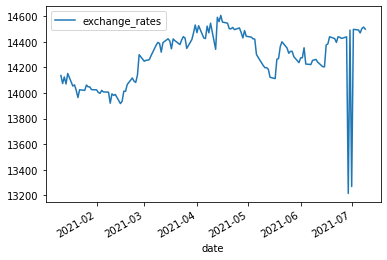

In [92]:
df4.plot()

Based on the visualization above, there are significant decrease of the exchange rates within the specific dates in between the end of June 2021 and the beginning of July 2021. However, the data validation process is required for further analysis, especially, if the data will be used for forecasting purpose.

## Conclusion

Web scrapping by using BeautifulSoup is useful for extracting structured data from a website. It can parse data from HTML files. Learning about BeautifulSoap features and doing a little of wrangling in this capstone project are beneficial for data analytics.